#### EE7204 Computer Vision and Image Processing - Take Home Assignment 01
#### EG/2018/3318 - Dissanayake D.M.M.B

In [74]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import skimage

### Q1

<Figure size 640x480 with 0 Axes>

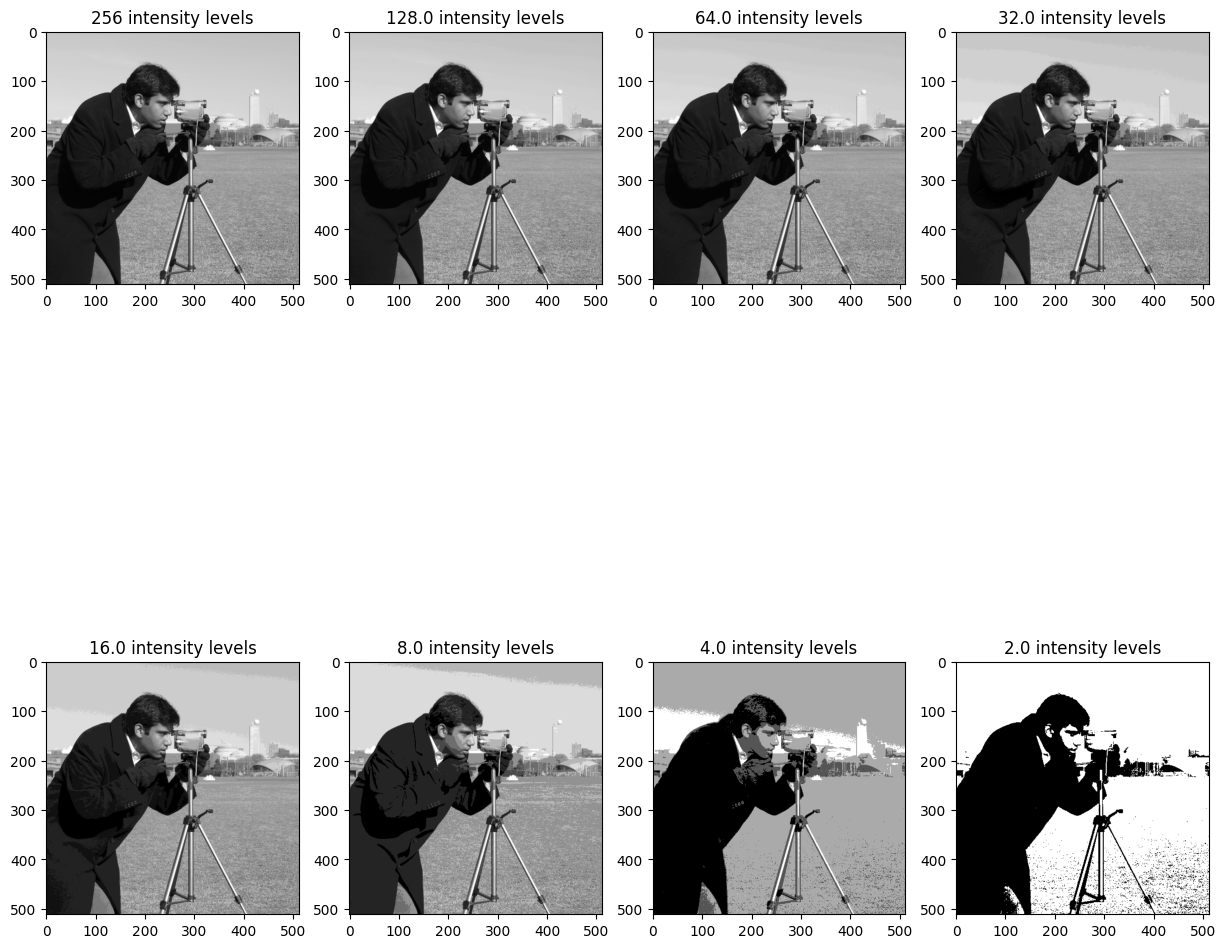

In [87]:
from skimage import data 
image = data.camera()

# im0 = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

plt.gray()

f, arr0 = plt.subplots(2, 4,figsize=(15,15))

# Desired number of intensity levels as a variable input
int_levels = 256

# or Desired number of intensity levels (int_levels) can be obtained as a user input using the following (commented) command
#int_levels = int(input("Enter the number of intensity levels (in powers of 2): "))

for i in range(2):
    for j in range(4):  
        step = np.round(255/(int_levels-1));
        new_img = (np.round(image/step)*step).astype(int);
        arr0[i,j].imshow(new_img);
        arr0[i,j].set_title('{} intensity levels'.format(int_levels))
        int_levels /= 2 


### Q2

Text(0.5, 1.0, '20 x 20')

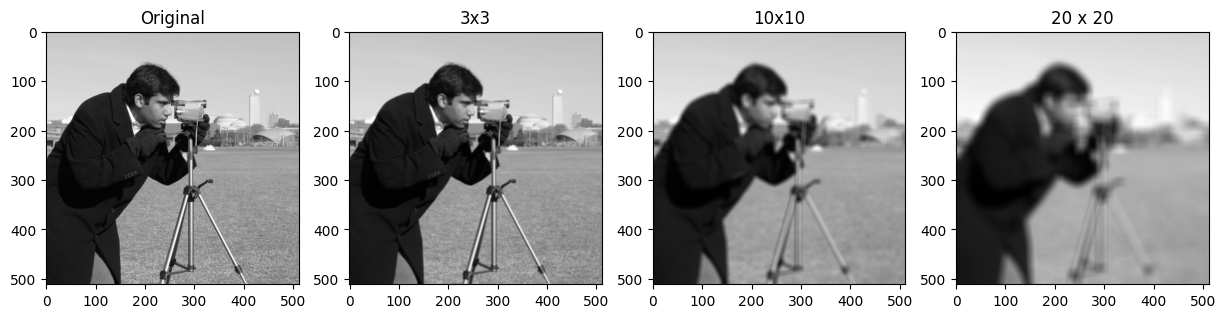

In [84]:
f, arr1 = plt.subplots(1,4,figsize=(15,15))

#for 3x3
image3k = cv2.blur(image,(3,3))

#for 10x10
image10k = cv2.blur(image,(10,10))

#for 20x20
image20k = cv2.blur(image,(20,20))

#show images
arr1[0].imshow(image)
arr1[0].set_title('Original')
arr1[1].imshow(image3k)
arr1[1].set_title('3x3')
arr1[2].imshow(image10k)
arr1[2].set_title('10x10')
arr1[3].imshow(image20k)
arr1[3].set_title('20 x 20')

### Q3

Text(0.5, 1.0, '90 degrees rotation')

<Figure size 640x480 with 0 Axes>

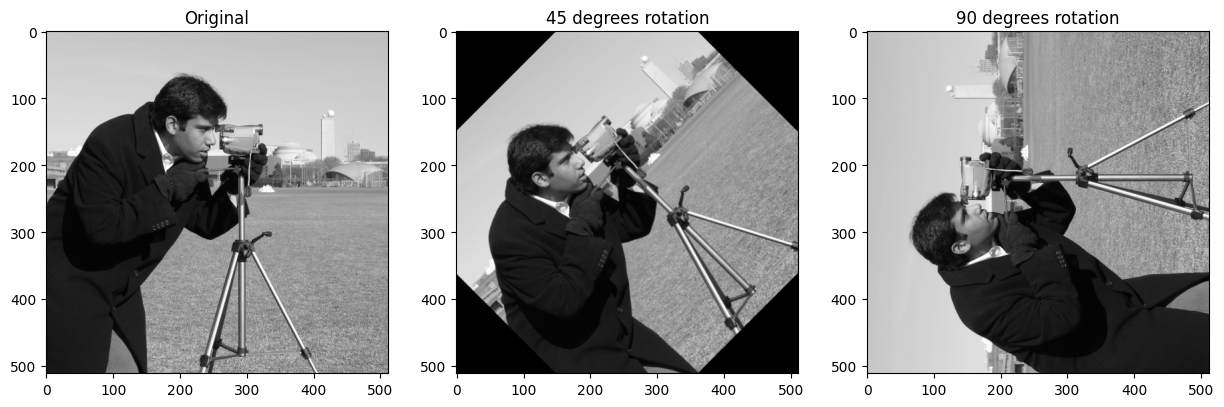

In [85]:
plt.gray()

h, w = image.shape[:2]

# Define the rotation matrix for 45 degrees
M_45 = cv2.getRotationMatrix2D((w/2, h/2), 45, 1)
# Rotate the image by 45 degrees
rotated_45 = cv2.warpAffine(image, M_45, (w, h))

# Define the rotation matrix for 90 degrees
M_90 = cv2.getRotationMatrix2D((w/2, h/2), 90, 1)
# Rotate the image by 90 degrees
rotated_90 = cv2.warpAffine(image, M_90, (w, h))

f, arr2 = plt.subplots(1,3,figsize=(15,15))
arr2[0].imshow(image)
arr2[0].set_title('Original')
arr2[1].imshow(rotated_45)
arr2[1].set_title('45 degrees rotation')
arr2[2].imshow(rotated_90)
arr2[2].set_title('90 degrees rotation')

### Q4

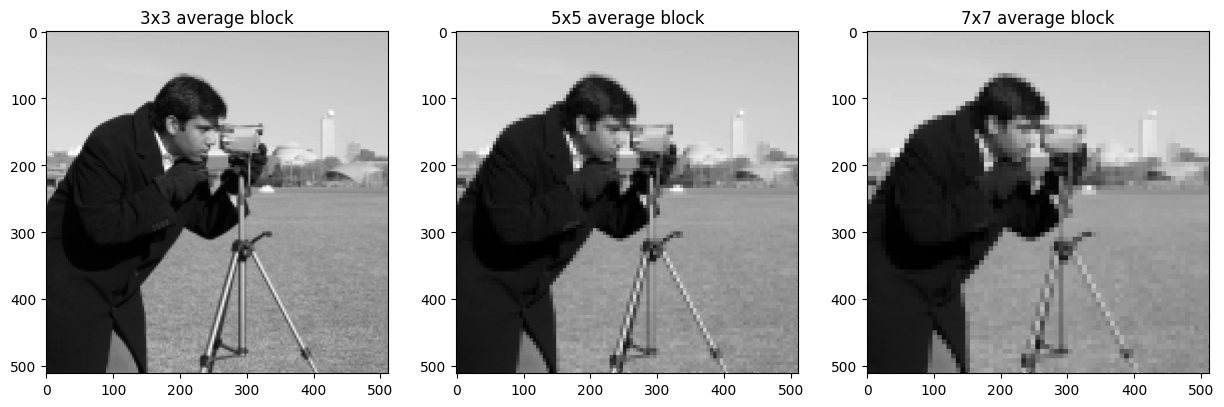

In [86]:
def average_block(image, block_size):
    rows,cols = image.shape[:2]
    im_mod = image.copy()
    for r in range(block_size//2,rows,block_size):
        for c in range(block_size//2,cols,block_size):
            im_mod[r-block_size//2:r+block_size//2+1,c-block_size//2:c+block_size//2+1] = np.average(image[r-block_size//2:r+block_size//2+1,c-block_size//2:c+block_size//2+1])
    return im_mod

block_sizes = [3, 5, 7]
f, arr3 = plt.subplots(1, len(block_sizes),figsize=(15,15))
for i, block_size in enumerate(block_sizes):
    im_mod = average_block(image, block_size)
    arr3[i].imshow(im_mod)
    arr3[i].set_title('{}x{} average block'.format(block_size, block_size))

plt.show()